In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\babhi\\OneDrive\\Desktop\\7th sem\\FIP\\nd csv.csv")
print(data.shape)
print(data.describe())
data.head()


(1154, 19)
              Test   NumOfHoles   Faceheight    Holedepth     Holesize  \
count  1154.000000  1154.000000  1154.000000  1154.000000  1154.000000   
mean     85.366551    46.869151    10.272077    11.090600   117.219129   
std      50.689795    66.473982     7.428265     7.809628    45.747856   
min       2.000000     3.000000     2.743200     3.048000    63.500000   
25%      35.250000    14.250000     5.486400     6.096000    76.200000   
50%      90.000000    31.000000     9.144000     9.448800    88.900000   
75%     132.000000    51.000000    13.373100    14.020800   152.400000   
max     171.000000   490.000000    58.674000    63.246000   228.600000   

          Stemming       Burden      spacing            G  nodelayintervals  \
count  1154.000000  1154.000000  1154.000000  1154.000000       1154.000000   
mean      3.041067     3.053943     3.432434     0.818523          8.273050   
std       1.669364     1.515552     1.466570     1.019333          7.533693   
min   

,Quarry,Test,Geology,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency,PPV
0,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,64.9546,3.9373,50.0,44.1960
1,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,95.5654,5.7928,25.0,37.3380
2,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,126.1762,7.6484,20.0,23.4442
3,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,156.0403,9.4586,16.0,17.2720
4,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,186.6511,11.3142,20.0,17.6276


In [18]:
details = data.describe()
details
sd = details.iloc[2:3,:]
median = details.iloc[5:6,:]
mean = details.iloc[1:2,:]
for i in range(1154):
    for j in range(18):
        if not (mean[j] - 3*sd[j] < data.iloc[i:i+1,j:j+1] < mean[j] + 3*sd[j]):
            data.iloc[i:i+1,j:j+1] = median[j]


KeyError: 0

In [7]:
data.describe()

,Test,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency,PPV
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,85.366551,46.869151,10.272077,11.090600,117.219129,3.041067,3.053943,3.432434,0.818523,8.273050,45.665945,113.568739,460.206684,262.005012,18.494292,33.530329,23.578440
std,50.689795,66.473982,7.428265,7.809628,45.747856,1.669364,1.515552,1.466570,1.019333,7.533693,75.295541,227.000209,782.730487,185.990222,19.517340,23.062294,34.978715
min,2.000000,3.000000,2.743200,3.048000,63.500000,0.609600,0.000000,0.609600,-1.828800,0.000000,0.000000,4.309100,11.339800,42.966300,1.534200,7.000000,0.063500
25%,35.250000,14.250000,5.486400,6.096000,76.200000,1.828800,2.133600,2.438400,0.000000,3.000000,17.000000,18.143700,160.118100,126.540850,7.297625,21.000000,4.178300
50%,90.000000,31.000000,9.144000,9.448800,88.900000,2.743200,2.743200,3.048000,0.609600,6.000000,25.000000,45.586000,298.463800,211.251650,12.649250,29.000000,12.547600
75%,132.000000,51.000000,13.373100,14.020800,152.400000,4.419600,3.657600,4.572000,1.219200,10.000000,26.000000,90.718500,544.310800,341.592925,22.039950,42.000000,29.718000
max,171.000000,490.000000,58.674000,63.246000,228.600000,7.772400,9.144000,8.839200,5.486400,47.000000,650.000000,1780.350100,8901.750300,1109.493100,166.996900,559.000000,530.860000


In [ ]:
m = [0]*18
m = np.array(m)
x = []
x = np.array(x)
for i in range(1154):
    curr = []
    for j in range(18):
        curr.append(data.iloc[i:i+1,j:j+1])
    curr = np.array(curr)
    np.x.append(curr)
    
y = []
for i in range(1154):
    y.append(data.iloc[i:i+1,18:19])
y = np.array(y)
y.reshape(1154,1)

In [ ]:
def MSE(m,x,c):
    error = 0
    n = 1154
    for i in range(n):
        curr_error = y[i] - (np.product(m,x[i]) + c[i]) 
        error += curr_error ** 2
    return error


In [ ]:
def sensitivity_analysis(m,x,c,data):
    ans = 10**-9
    key = -1
    ## Increment in steps on 1 percent for each dependent variable....
    
    initial_value = np.product(m,x[0]) + c
    for i in range(18):
        curr_increment = 0
        mini = data[i].min()
        maxi = data[i].max()
        increment = (maxi-mini)/100
        x[0][i] += increment
        new_value = np.product(m[0],x[0]) + c
        if abs(new_value-initial_value) > ans:
            ans = abs(new_value-initial_value)
            key = i
        x[0][i] -= increment
    return key



In [ ]:
def r_square_value(y,ypred):
    varaince_y = 0
    r_square = 1
    varaince_ypred = 0
    mean_y = np.mean(y)
    for i in range(1154):
        varaince_y += (y[i]-mean_y)**2
        varaince_ypred += (ypred[i]-mean_y)**2
        
    return 1-varaince_ypred/varaince_y

In [ ]:
def gradient_descent(x,y):
    n = 1154
    m = [0]*18
    c = 0
    learning_rate = 0.001
    num_of_iterations = 1000
    for i in range(num_of_iterations):
        e = 0
        ypred = [0]*1154
        ypred = np.array(ypred)
        ypred = ypred.reshape(1154,1)
        for j in range(n):
            ypred = np.product(m,x[i]) + c
            for k in range(1154):
                e += (y[k]-ypred[k])**2
        m_update = (-2/n)*(x[i]*(sum(y-ypred)))
        c_update = (-2/n)*(sum(y-ypred))
        m = m - learning_rate * m_update
        c = c- learning_rate * c_update
    return m, c

            

In [11]:
data.isnull().sum()
data.drop('G')
data['NumOfHoles'] = data['NumOfHoles'].as_type('float')

,Quarry,Test,Geology,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency,PPV
0,B1,2,limestone,3.0,9.144,10.9728,152.400,4.5720,3.048,4.5720,1.8288,0.0,0.0,90.7185,272.1554,64.9546,3.9373,50.0,44.1960
1,B1,2,limestone,3.0,9.144,10.9728,152.400,4.5720,3.048,4.5720,1.8288,0.0,0.0,90.7185,272.1554,95.5654,5.7928,25.0,37.3380
2,B1,2,limestone,3.0,9.144,10.9728,152.400,4.5720,3.048,4.5720,1.8288,0.0,0.0,90.7185,272.1554,126.1762,7.6484,20.0,23.4442
3,B1,2,limestone,3.0,9.144,10.9728,152.400,4.5720,3.048,4.5720,1.8288,0.0,0.0,90.7185,272.1554,156.0403,9.4586,16.0,17.2720
4,B1,2,limestone,3.0,9.144,10.9728,152.400,4.5720,3.048,4.5720,1.8288,0.0,0.0,90.7185,272.1554,186.6511,11.3142,20.0,17.6276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,B24,171,dolomite_limestone,46.0,58.674,63.2460,187.325,3.6576,9.144,7.0104,4.5720,22.0,17.0,1780.3501,8901.7503,257.9032,2.7335,20.0,235.2040
1150,B24,171,dolomite_limestone,46.0,58.674,63.2460,187.325,3.6576,9.144,7.0104,4.5720,22.0,17.0,1780.3501,8901.7503,351.8415,3.7291,25.0,144.2720
1151,B24,171,dolomite_limestone,46.0,58.674,63.2460,187.325,3.6576,9.144,7.0104,4.5720,22.0,17.0,1780.3501,8901.7503,473.9612,5.0235,22.0,169.4180
1152,B24,171,dolomite_limestone,46.0,58.674,63.2460,187.325,3.6576,9.144,7.0104,4.5720,22.0,17.0,1780.3501,8901.7503,636.2182,6.7432,36.0,130.8100


In [5]:
data.describe()


,Quarry,Test,Geology,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency,PPV
0,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,64.9546,3.9373,50.0,44.1960
1,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,95.5654,5.7928,25.0,37.3380
2,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,126.1762,7.6484,20.0,23.4442
3,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,156.0403,9.4586,16.0,17.2720
4,B1,2,limestone,3.0,9.144,10.9728,152.4,4.572,3.048,4.572,1.8288,0.0,0.0,90.7185,272.1554,186.6511,11.3142,20.0,17.6276


In [12]:
data.shape

(1154, 19)

In [13]:
data.dtypes


Quarry               object
Test                  int64
Geology              object
NumOfHoles          float64
Faceheight          float64
Holedepth           float64
Holesize            float64
Stemming            float64
Burden              float64
spacing             float64
G                   float64
nodelayintervals    float64
lengthdelay         float64
chargeperhole       float64
MCD                 float64
Distance            float64
Scaled_distance     float64
Frequency           float64
PPV                 float64
dtype: object

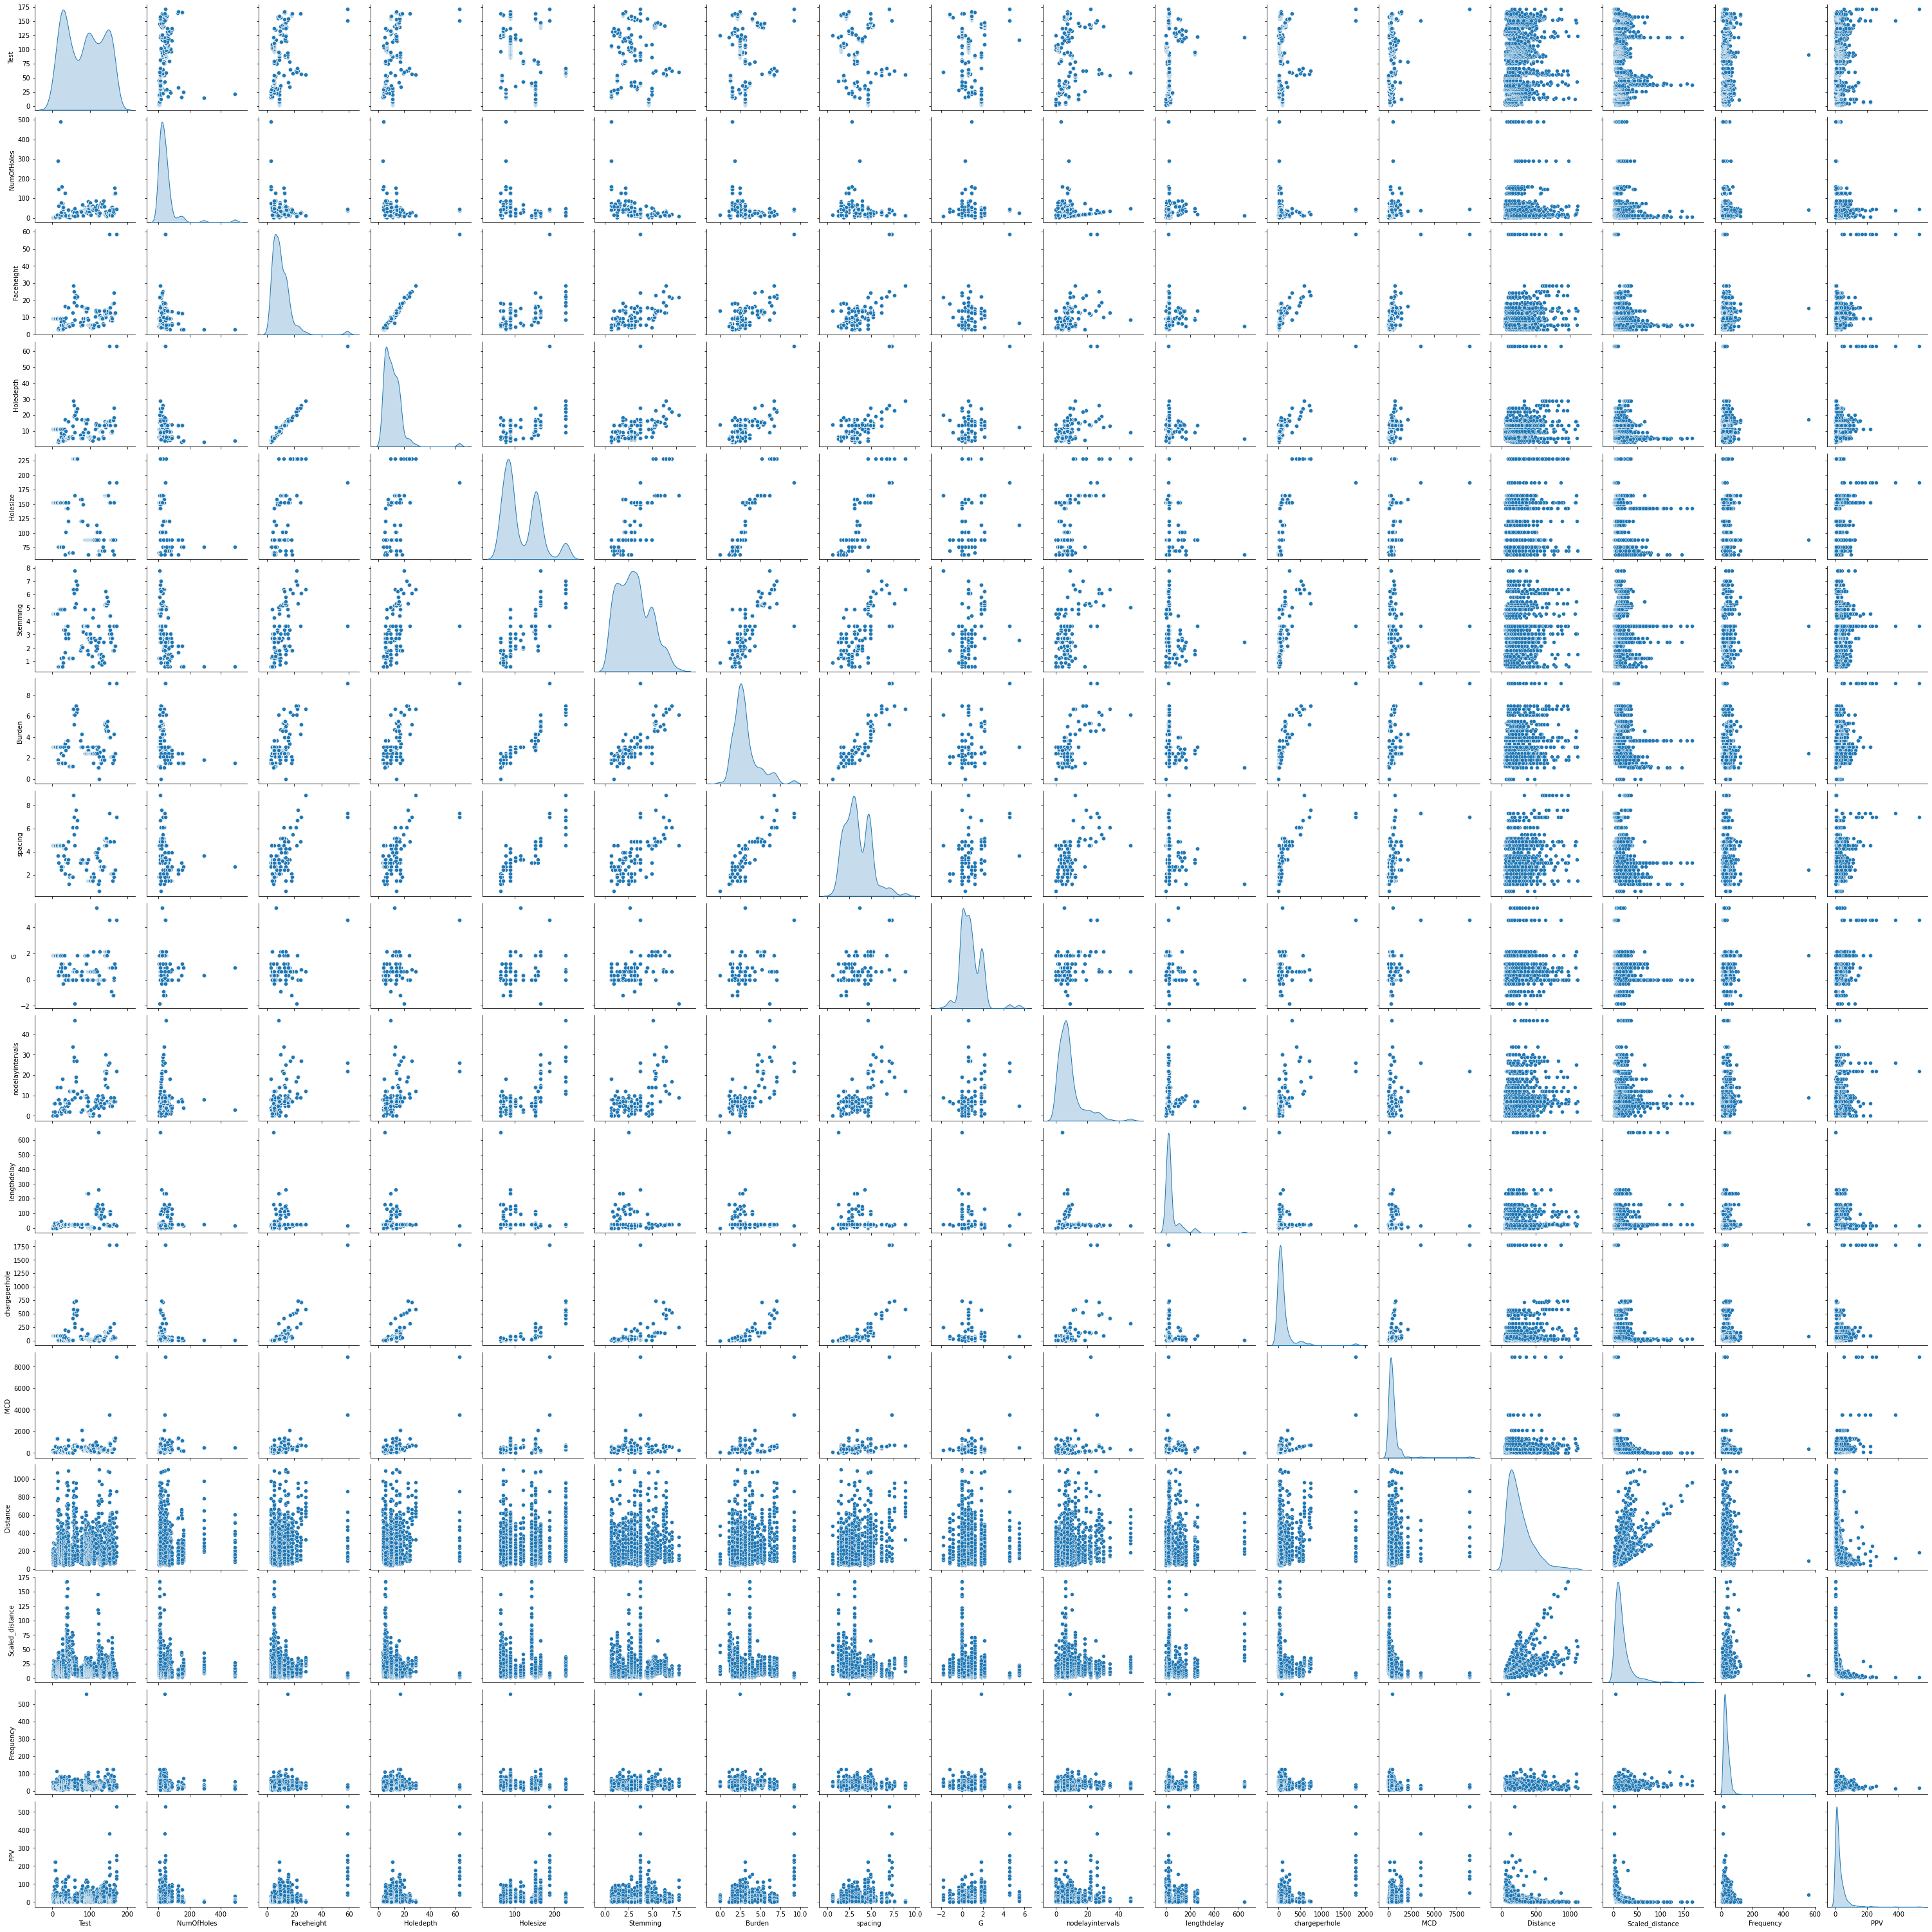

In [20]:
sns.pairplot(data,diag_kind='kde')

In [14]:
data.tail()

,Quarry,Test,Geology,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency,PPV
1149,B24,171,dolomite_limestone,46.0,58.674,63.246,187.325,3.6576,9.144,7.0104,4.572,22.0,17.0,1780.3501,8901.7503,257.9032,2.7335,20.0,235.204
1150,B24,171,dolomite_limestone,46.0,58.674,63.246,187.325,3.6576,9.144,7.0104,4.572,22.0,17.0,1780.3501,8901.7503,351.8415,3.7291,25.0,144.272
1151,B24,171,dolomite_limestone,46.0,58.674,63.246,187.325,3.6576,9.144,7.0104,4.572,22.0,17.0,1780.3501,8901.7503,473.9612,5.0235,22.0,169.418
1152,B24,171,dolomite_limestone,46.0,58.674,63.246,187.325,3.6576,9.144,7.0104,4.572,22.0,17.0,1780.3501,8901.7503,636.2182,6.7432,36.0,130.810
1153,B24,171,dolomite_limestone,46.0,58.674,63.246,187.325,3.6576,9.144,7.0104,4.572,22.0,17.0,1780.3501,8901.7503,866.7939,9.1871,24.0,52.578


In [15]:
arr = np.array(data)

In [16]:
arr

array([['B1', 2, 'limestone', ..., 3.9373, 50.0, 44.196],
       ['B1', 2, 'limestone', ..., 5.7928, 25.0, 37.338],
       ['B1', 2, 'limestone', ..., 7.6484, 20.0, 23.4442],
       ...,
       ['B24', 171, 'dolomite_limestone', ..., 5.0235, 22.0, 169.418],
       ['B24', 171, 'dolomite_limestone', ..., 6.7432, 36.0, 130.81],
       ['B24', 171, 'dolomite_limestone', ..., 9.1871, 24.0, 52.578]],
      dtype=object)

In [17]:
arr.shape

(1154, 19)

In [18]:
result = smf.ols('PPV ~ NumOfHoles + Faceheight + Holedepth + Holesize + Stemming + Burden + spacing + G + nodelayintervals + lengthdelay + chargeperhole + MCD + Distance + Scaled_distance + Frequency',data = data)

In [19]:
res = result.fit()

In [20]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPV   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     86.55
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          5.82e-168
Time:                        11:42:21   Log-Likelihood:                -5321.1
No. Observations:                1154   AIC:                         1.067e+04
Df Residuals:                    1139   BIC:                         1.075e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.4951      4.227      3.430      0.001       6.202      22.788
NumOfHoles           0.0104      0.013      0.778      0.436      -0.016       0.036
Faceheight          -0.0465      0.303     -0.153      0.878      -0.642       0.549
Holedepth            1.4862      0.324      4.580      0.000       0.850       2.123
Holesize            -0.0349      0.050     -0.700      0.484      -0.133       0.063
Stemming             0.6646      0.965      0.688      0.491      -1.230       2.559
Burden               3.0777      1.533      2.007      0.045       0.069       6.086
spacing              0.5469      1.035      0.528      0.597      -1.484       2.578
G                    1.5326      0.568      2.697      0.007       0.418       2.647
nodelayintervals    -0.1242      0.129     -0.960      0.337      -0.378       0.130
lengthdelay          0.0065      0.010      0.630      0.529      -0.014       0.027
chargeperhole       -0.0331      0.011     -3.000      0.003      -0.055      -0.011
MCD                  0.0214      0.002     12.147      0.000       0.018       0.025
Distance            -0.0957      0.006    -17.263      0.000      -0.107      -0.085
Scaled_distance      0.2120      0.056      3.794      0.000       0.102       0.322
Frequency           -0.0614      0.033     -1.857      0.064      -0.126       0.003
==============================================================================
Omnibus:                     1000.416   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51097.920
Skew:                           3.710   Prob(JB):                         0.00
Kurtosis:                      34.743   Cond. No.                     7.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
nr = result = smf.ols('PPV ~  lengthdelay + chargeperhole + MCD + Distance + Scaled_distance + Frequency',data = data)

In [22]:
nres = result.fit()

In [23]:
nres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPV   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     182.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          3.96e-163
Time:                        11:42:26   Log-Likelihood:                -5352.2
No. Observations:                1154   AIC:                         1.072e+04
Df Residuals:                    1147   BIC:                         1.075e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.7023      1.806     18.107      0.000      29.159      36.246
lengthdelay         0.0059      0.010      0.593      0.553      -0.014       0.025
chargeperhole       0.0266      0.005      5.363      0.000       0.017       0.036
MCD                 0.0214      0.001     14.584      0.000       0.019       0.024
Distance           -0.0903      0.005    -16.988      0.000      -0.101      -0.080
Scaled_distance     0.0970      0.051      1.886      0.060      -0.004       0.198
Frequency          -0.0117      0.033     -0.359      0.720      -0.076       0.052
==============================================================================
Omnibus:                      961.430   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42569.357
Skew:                           3.531   Prob(JB):                         0.00
Kurtosis:                      31.904   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
x = data.iloc[:,3:18]

In [25]:
y = data.iloc[:,18:]

In [26]:
y

,PPV
0,44.1960
1,37.3380
2,23.4442
3,17.2720
4,17.6276
...,...
1149,235.2040
1150,144.2720
1151,169.4180
1152,130.8100


In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [28]:
regressionmodel = LinearRegression()
regressionmodel.fit(xtrain,ytrain)

LinearRegression()

In [29]:
coeff = regressionmodel.coef_
icp = regressionmodel.intercept_
icp

array([13.73478613])

In [30]:
arr = np.array(xtest)

In [33]:
ypred = []
for i in range(289):
    curr = 0
    curr += sum(coeff*arr[i])
    curr += 13.73478613
    ypred.append(curr)
    

In [31]:
coeff = coeff[0]

In [32]:
coeff

array([ 0.02624245, -0.09041175,  1.89847962,  0.01155471,  0.02928678,
        2.97967612, -0.28256854,  1.98889137, -0.23227746,  0.00914795,
       -0.03097987,  0.01495602, -0.09482915,  0.15243928, -0.06906855])

In [34]:
ypred

[23.846418619588217,
 20.47338942398646,
 19.450643074404255,
 8.158608853156464,
 42.88937066321442,
 32.848700071961474,
 29.48147863845059,
 36.09708800524498,
 28.827023929358234,
 26.642324143851248,
 31.94319506377583,
 -1.9585106572287732,
 3.5142808364768925,
 41.27667009826664,
 13.101180982276,
 10.494988435573235,
 16.499742004519703,
 4.84421781190734,
 28.05875818083323,
 27.855892552405127,
 20.49405823390815,
 7.419049890010427,
 23.300094958375453,
 -0.12907656120687427,
 51.83456737375904,
 5.201316014795687,
 31.04908266475057,
 27.219206355626618,
 30.860207607394848,
 17.378552018671254,
 49.29178404513276,
 16.584896742103787,
 35.51722170612307,
 0.40837088130624366,
 34.46299029690339,
 24.04027232980009,
 40.824643406038234,
 6.900570939485272,
 29.319482294240125,
 42.099855428570784,
 22.737799057835318,
 36.17060969062436,
 16.327022588686948,
 34.52914132305298,
 26.198936223908856,
 19.20597492941966,
 21.483831345177975,
 34.46271077572203,
 43.46205805028

In [35]:
ypred
for i in range(289):
    if ypred[i] < 0:
        ypred[i] = 0
ypred

[23.846418619588217,
 20.47338942398646,
 19.450643074404255,
 8.158608853156464,
 42.88937066321442,
 32.848700071961474,
 29.48147863845059,
 36.09708800524498,
 28.827023929358234,
 26.642324143851248,
 31.94319506377583,
 0,
 3.5142808364768925,
 41.27667009826664,
 13.101180982276,
 10.494988435573235,
 16.499742004519703,
 4.84421781190734,
 28.05875818083323,
 27.855892552405127,
 20.49405823390815,
 7.419049890010427,
 23.300094958375453,
 0,
 51.83456737375904,
 5.201316014795687,
 31.04908266475057,
 27.219206355626618,
 30.860207607394848,
 17.378552018671254,
 49.29178404513276,
 16.584896742103787,
 35.51722170612307,
 0.40837088130624366,
 34.46299029690339,
 24.04027232980009,
 40.824643406038234,
 6.900570939485272,
 29.319482294240125,
 42.099855428570784,
 22.737799057835318,
 36.17060969062436,
 16.327022588686948,
 34.52914132305298,
 26.198936223908856,
 19.20597492941966,
 21.483831345177975,
 34.46271077572203,
 43.46205805028722,
 35.65397072405431,
 19.09893670

In [36]:
yorg = np.array(ytest)

In [30]:
yorg.shape


(289, 1)

In [31]:
yorg

array([[9.65200e+00],
       [6.14680e+00],
       [8.61060e+00],
       [1.80850e+00],
       [3.86080e+01],
       [4.95300e+01],
       [2.41300e+01],
       [6.01980e+01],
       [1.61798e+01],
       [2.47142e+01],
       [7.06120e+01],
       [8.63600e-01],
       [1.72470e+00],
       [4.01320e+00],
       [2.29870e+01],
       [4.26700e-01],
       [4.92760e+00],
       [5.71500e+00],
       [1.34874e+01],
       [5.25780e+00],
       [2.37744e+01],
       [2.99720e+00],
       [3.96240e+00],
       [9.29640e+00],
       [3.75920e+01],
       [3.60700e-01],
       [1.81102e+01],
       [4.03860e+01],
       [4.01320e+01],
       [2.79400e+00],
       [9.24560e+01],
       [1.89484e+01],
       [2.01676e+01],
       [3.04800e+00],
       [7.62000e+00],
       [1.31318e+01],
       [3.91160e+01],
       [7.11200e+00],
       [7.23900e+00],
       [4.52120e+01],
       [2.89560e+00],
       [4.74980e+01],
       [1.25222e+01],
       [6.70560e+01],
       [7.16280e+00],
       [1.

In [32]:
ytest

,PPV
1103,9.6520
439,6.1468
561,8.6106
201,1.8085
548,38.6080
...,...
325,21.2344
1124,7.3406
59,5.9944
13,86.8680


In [37]:
RMSE = 0
for i in range(289):
    if ypred[i] > 0 and abs(ypred[i]-yorg[i][0]) < 5 :
        RMSE += (ypred[i]-yorg[i][0])**2
RMSE/= 289
RMSE = RMSE**0.5

In [38]:
RMSE

1.2976334073152873

In [39]:
yorgi = []
for i in range(289):
    yorgi.append(yorg[i][0])


In [36]:
ypred

[23.846418619588217,
 20.47338942398646,
 19.450643074404255,
 8.158608853156464,
 42.88937066321442,
 32.848700071961474,
 29.48147863845059,
 36.09708800524498,
 28.827023929358234,
 26.642324143851248,
 31.94319506377583,
 0,
 3.5142808364768925,
 41.27667009826664,
 13.101180982276,
 10.494988435573235,
 16.499742004519703,
 4.84421781190734,
 28.05875818083323,
 27.855892552405127,
 20.49405823390815,
 7.419049890010427,
 23.300094958375453,
 0,
 51.83456737375904,
 5.201316014795687,
 31.04908266475057,
 27.219206355626618,
 30.860207607394848,
 17.378552018671254,
 49.29178404513276,
 16.584896742103787,
 35.51722170612307,
 0.40837088130624366,
 34.46299029690339,
 24.04027232980009,
 40.824643406038234,
 6.900570939485272,
 29.319482294240125,
 42.099855428570784,
 22.737799057835318,
 36.17060969062436,
 16.327022588686948,
 34.52914132305298,
 26.198936223908856,
 19.20597492941966,
 21.483831345177975,
 34.46271077572203,
 43.46205805028722,
 35.65397072405431,
 19.09893670

In [40]:
RMSE = 0
for i in range(289):
    c = (ypred[i]-yorgi[i])**2
    if c < 100:
        RMSE += c

RMSE /= 289
RMSE = RMSE**0.5

In [41]:
RMSE

3.76336775284201

In [42]:
xtest

,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency
1103,54.0,9.1440,10.0584,88.900,2.7432,2.1336,2.1336,0.9144,7.0,17.0,33.1122,298.4638,183.7366,10.6353,64.0
439,13.0,6.0960,6.0960,66.675,1.2192,1.2192,1.8288,0.0000,12.0,25.0,11.7934,11.7934,69.7827,20.3202,33.0
561,31.0,10.0584,12.1920,165.100,5.1816,4.7244,5.1816,2.1336,30.0,21.0,88.9041,137.4385,316.2151,26.9729,42.0
201,78.0,5.4864,6.0960,76.200,1.2192,2.4384,2.7432,0.6096,2.0,50.0,11.3398,283.4952,344.4240,20.4560,24.0
548,19.0,14.3256,16.1544,165.100,5.2578,5.1816,5.0292,1.8288,18.0,21.0,163.2933,181.4369,134.1120,9.9565,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,12.0,4.2672,4.5720,101.600,3.0480,3.0480,3.3528,0.3048,5.0,25.0,19.0509,38.1018,76.2636,12.3551,33.0
1124,45.0,17.9832,16.7640,69.850,1.8288,1.5240,1.5240,-1.2192,7.0,25.0,47.6272,292.1135,247.5186,14.4821,21.0
59,15.0,9.1440,10.9728,152.400,4.5720,3.0480,4.5720,1.8288,14.0,34.0,90.7185,1360.7771,901.5075,24.4386,24.0
13,7.0,9.1440,10.9728,152.400,4.5720,3.0480,4.5720,1.8288,6.0,17.0,90.7185,90.7185,48.7089,5.1140,28.0


In [43]:
ytest

,PPV
1103,9.6520
439,6.1468
561,8.6106
201,1.8085
548,38.6080
...,...
325,21.2344
1124,7.3406
59,5.9944
13,86.8680


Text(0, 0.5, 'PPV, mm/s')

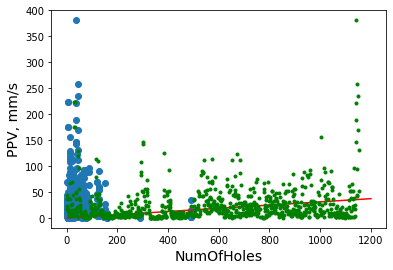

In [45]:
plt.scatter(xtrain['NumOfHoles'],ytrain)

new = np.array([np.array(xtrain['NumOfHoles']).min(),1200])
ynew = 0.03097987*new
plt.plot(new,ynew,color = 'red')
plt.plot(ytrain, '.',color = 'green')
plt.xlabel('NumOfHoles',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'PPV, mm/s')

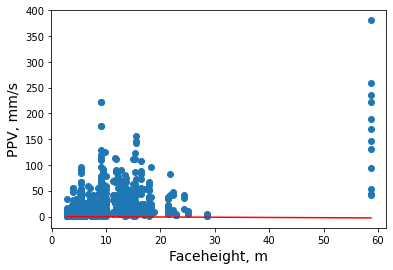

In [172]:
plt.scatter(xtrain['Faceheight'],ytrain)

new = np.array([np.array(xtest['Faceheight']).min(),np.array(xtest['Faceheight']).max()])
ynew = -0.0465*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Faceheight, m',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

In [96]:
coeff

array([ 0.02624245, -0.09041175,  1.89847962,  0.01155471,  0.02928678,
        2.97967612, -0.28256854,  1.98889137, -0.23227746,  0.00914795,
       -0.03097987,  0.01495602, -0.09482915,  0.15243928, -0.06906855])

Text(0, 0.5, 'PPV, mm/s')

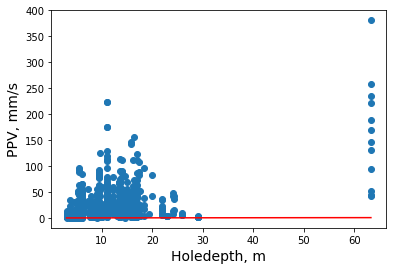

In [64]:
plt.scatter(xtrain['Holedepth'],ytrain)

new = np.array([np.array(xtrain['Holedepth']).min(),np.array(xtrain['Holedepth']).max()])
ynew = 0.00914795*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Holedepth, m',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'PPV, mm/s')

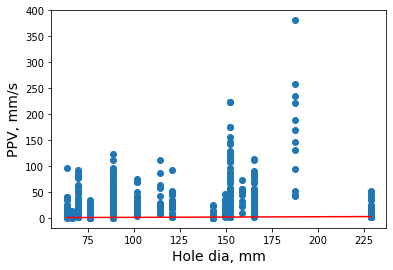

In [66]:
plt.scatter(xtrain['Holesize'],ytrain)

new = np.array([np.array(xtest['Holesize']).min(),np.array(xtest['Holesize']).max()])
ynew = 0.01155471*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Hole dia, mm',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'PPV, mm/s')

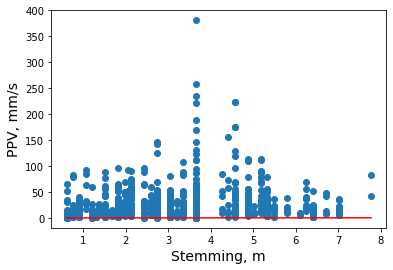

In [60]:
plt.scatter(xtrain['Stemming'],ytrain)

new = np.array([np.array(xtest['Stemming']).min(),np.array(xtest['Stemming']).max()])
ynew = 0.02928678*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Stemming, m',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'PPV, m')

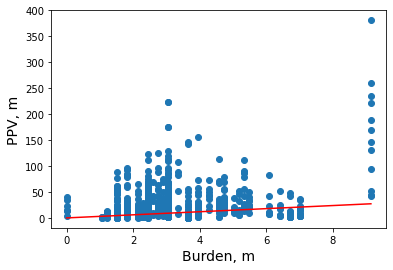

In [65]:
plt.scatter(xtrain['Burden'],ytrain)

new = np.array([np.array(xtrain['Burden']).min(),np.array(xtrain['Burden']).max()])
ynew =2.97967612*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Burden, m',fontsize = 14)
plt.ylabel('PPV, m',fontsize = 14)

Text(0, 0.5, 'PPV, mm/s')

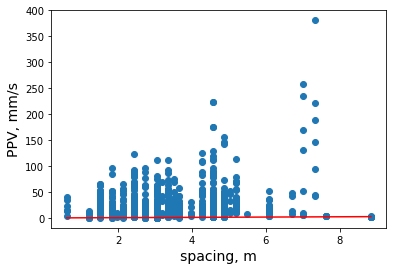

In [62]:
plt.scatter(xtrain['spacing'],ytrain)

new = np.array([np.array(xtrain['spacing']).min(),np.array(xtest['spacing']).max()])
ynew =0.28256854*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('spacing, m',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'Ypred')

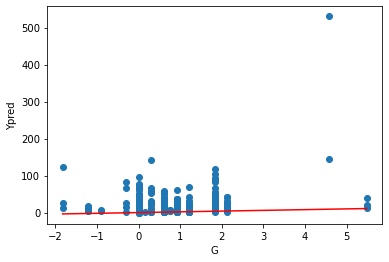

In [104]:
plt.scatter(xtest['G'],ytest)

new = np.array([np.array(xtest['G']).min(),np.array(xtest['G']).max()])
ynew =1.98889137*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('G')
plt.ylabel('Ypred')

Text(0, 0.5, 'Ypred')

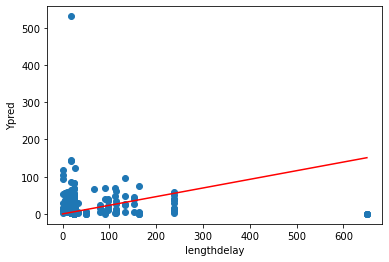

In [106]:

plt.scatter(xtest['lengthdelay'],ytest)

new = np.array([np.array(xtest['lengthdelay']).min(),np.array(xtest['lengthdelay']).max()])
ynew =0.23227746*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('lengthdelay')
plt.ylabel('Ypred')

Text(0, 0.5, 'PPV, mm/s')

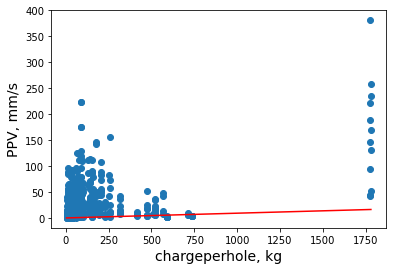

In [61]:
plt.scatter(xtrain['chargeperhole'],ytrain)
new = np.array([np.array(xtest['chargeperhole']).min(),np.array(xtest['chargeperhole']).max()])
ynew = 0.00914795*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('chargeperhole, kg',fontsize = 14)
plt.ylabel('PPV, mm/s', fontsize = 14)

In [109]:
coeff

array([ 0.02624245, -0.09041175,  1.89847962,  0.01155471,  0.02928678,
        2.97967612, -0.28256854,  1.98889137, -0.23227746,  0.00914795,
       -0.03097987,  0.01495602, -0.09482915,  0.15243928, -0.06906855])

In [110]:
xtest

,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency
1103,54.0,9.1440,10.0584,88.900,2.7432,2.1336,2.1336,0.9144,7.0,17.0,33.1122,298.4638,183.7366,10.6353,64.0
439,13.0,6.0960,6.0960,66.675,1.2192,1.2192,1.8288,0.0000,12.0,25.0,11.7934,11.7934,69.7827,20.3202,33.0
561,31.0,10.0584,12.1920,165.100,5.1816,4.7244,5.1816,2.1336,30.0,21.0,88.9041,137.4385,316.2151,26.9729,42.0
201,78.0,5.4864,6.0960,76.200,1.2192,2.4384,2.7432,0.6096,2.0,50.0,11.3398,283.4952,344.4240,20.4560,24.0
548,19.0,14.3256,16.1544,165.100,5.2578,5.1816,5.0292,1.8288,18.0,21.0,163.2933,181.4369,134.1120,9.9565,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,12.0,4.2672,4.5720,101.600,3.0480,3.0480,3.3528,0.3048,5.0,25.0,19.0509,38.1018,76.2636,12.3551,33.0
1124,45.0,17.9832,16.7640,69.850,1.8288,1.5240,1.5240,-1.2192,7.0,25.0,47.6272,292.1135,247.5186,14.4821,21.0
59,15.0,9.1440,10.9728,152.400,4.5720,3.0480,4.5720,1.8288,14.0,34.0,90.7185,1360.7771,901.5075,24.4386,24.0
13,7.0,9.1440,10.9728,152.400,4.5720,3.0480,4.5720,1.8288,6.0,17.0,90.7185,90.7185,48.7089,5.1140,28.0


Text(0, 0.5, 'PPV, mm/s')

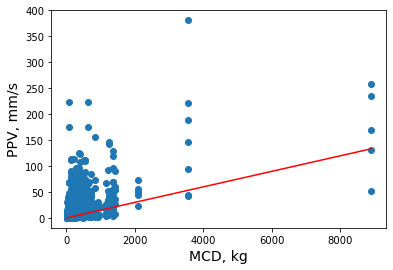

In [59]:
plt.scatter(xtrain['MCD'],ytrain)
new = np.array([np.array(xtest['MCD']).min(),np.array(xtest['MCD']).max()])
ynew = 0.01495602*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('MCD, kg',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'PPV, mm/s')

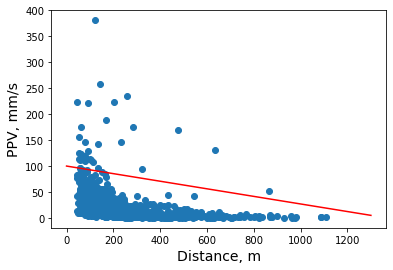

In [51]:
plt.scatter(xtrain['Distance'],ytrain)
new = [0,1300]
ynew = [100,5]
plt.plot(new,ynew,color = 'red')
plt.xlabel('Distance, m',fontsize = 14)
plt.ylabel('PPV, mm/s',fontsize = 14)

Text(0, 0.5, 'Ypred')

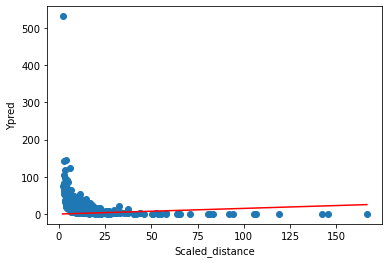

In [117]:
plt.scatter(xtest['Scaled_distance'],ytest)
new = np.array([np.array(xtest['Scaled_distance']).min(),np.array(xtest['Scaled_distance']).max()])
ynew = 0.15243928*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Scaled_distance')
plt.ylabel('Ypred')

Text(0, 0.5, 'Ypred')

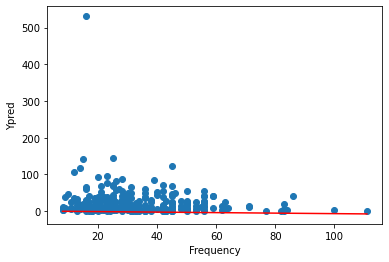

In [119]:
plt.scatter(xtest['Frequency'],ytest)
new = np.array([np.array(xtest['Frequency']).min(),np.array(xtest['Frequency']).max()])
ynew = -0.06906855*new
plt.plot(new,ynew,color = 'red')
plt.xlabel('Frequency')
plt.ylabel('Ypred')

In [121]:
xtrain.describe()

,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency
count,865.000000,865.000000,865.00000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,46.402312,10.264008,11.10811,116.138931,3.035050,3.031791,3.417988,0.844102,8.041734,42.831792,110.448640,458.990489,259.652211,18.186724,33.707514
std,65.252430,7.584641,8.01009,44.183149,1.643665,1.501004,1.455242,1.034523,7.100853,66.883543,232.308499,779.577212,183.246405,18.287221,24.774936
min,3.000000,2.743200,3.04800,63.500000,0.609600,0.000000,0.609600,-1.828800,0.000000,0.000000,4.309100,11.339800,42.966300,1.534200,7.000000
25%,14.000000,5.486400,6.09600,76.200000,1.828800,2.133600,2.133600,0.000000,3.000000,17.000000,18.279800,158.757300,126.447400,7.376800,21.000000
50%,31.000000,9.144000,9.44880,88.900000,2.743200,2.743200,3.048000,0.609600,6.000000,25.000000,45.586000,298.463800,209.581900,12.671900,29.000000
75%,51.000000,13.411200,14.02080,152.400000,4.419600,3.657600,4.572000,1.828800,10.000000,25.000000,90.718500,544.310800,332.450200,22.311500,42.000000
max,490.000000,58.674000,63.24600,228.600000,7.772400,9.144000,8.839200,5.486400,47.000000,650.000000,1780.350100,8901.750300,1109.493100,166.996900,559.000000


In [128]:
xtrain.iloc[0:,:1].min()

NumOfHoles    3.0
dtype: float64

In [129]:
coeff

array([ 0.02624245, -0.09041175,  1.89847962,  0.01155471,  0.02928678,
        2.97967612, -0.28256854,  1.98889137, -0.23227746,  0.00914795,
       -0.03097987,  0.01495602, -0.09482915,  0.15243928, -0.06906855])

In [143]:
xtrain

,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency
311,36.0,7.0104,7.3152,158.750,1.8288,3.6576,3.0480,0.3048,9.0,9.0,82.5538,486.2510,146.6999,6.6527,45.0
923,66.0,13.4112,14.0208,88.900,1.9812,2.4384,3.9624,0.6096,8.0,150.0,75.5231,755.2313,180.3392,6.5622,23.0
455,13.0,5.4864,5.4864,66.675,1.2192,1.2192,1.8288,0.0000,12.0,25.0,11.3398,11.3398,201.1680,59.7387,38.0
582,23.0,11.5824,13.7160,165.100,5.1816,4.5720,5.1816,2.1336,22.0,25.0,139.7064,139.7064,369.6310,31.2723,42.0
625,50.0,15.2400,17.0688,88.900,4.8768,2.4384,3.0480,1.8288,10.0,25.0,78.4715,627.7718,266.4716,10.6353,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,35.0,9.1440,9.1440,88.900,1.8288,2.7432,3.3528,0.0000,5.0,237.5,31.1164,217.7243,506.1798,34.3045,50.0
905,51.0,5.4864,6.0960,88.900,2.7432,2.4384,1.8288,0.6096,4.0,5.0,14.6964,163.2933,172.9169,13.5317,27.0
1096,11.0,8.2296,9.1440,88.900,2.7432,2.1336,2.1336,0.9144,5.0,17.0,39.0089,78.4715,404.9108,45.7092,8.0
235,55.0,3.3528,3.6576,76.200,1.2954,2.2860,4.5720,0.3048,3.0,25.0,6.8039,122.4699,138.7320,12.5361,28.0


In [114]:
ytest.describe()

,PPV
count,289.000000
mean,22.079712
std,38.475478
min,0.152100
25%,4.165600
50%,11.557000
75%,27.940000
max,530.860000


In [142]:
xtrain.corr()

,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency
NumOfHoles,1.000000,-0.196568,-0.196433,-0.345054,-0.428860,-0.274369,-0.183750,-0.079788,-0.091659,-0.055640,-0.114973,0.070088,0.085374,-0.104911,-0.101822
Faceheight,-0.196568,1.000000,0.992682,0.467964,0.384966,0.687871,0.560963,0.354587,0.448570,0.013283,0.903103,0.714049,0.136487,-0.197670,0.039246
Holedepth,-0.196433,0.992682,1.000000,0.485987,0.415434,0.702311,0.581650,0.464906,0.464924,-0.005759,0.909898,0.720966,0.123493,-0.207431,0.041600
Holesize,-0.345054,0.467964,0.485987,1.000000,0.827252,0.876555,0.820602,0.332002,0.516723,-0.174299,0.566961,0.216006,0.123216,-0.029590,0.013507
Stemming,-0.428860,0.384966,0.415434,0.827252,1.000000,0.729719,0.646504,0.394229,0.437737,-0.160724,0.379503,0.049950,0.041407,-0.046174,0.080013
Burden,-0.274369,0.687871,0.702311,0.876555,0.729719,1.000000,0.813362,0.394694,0.602490,-0.100522,0.785029,0.456260,0.169381,-0.069043,0.034413
spacing,-0.183750,0.560963,0.581650,0.820602,0.646504,0.813362,1.000000,0.390877,0.507949,-0.016162,0.643355,0.313494,0.151276,-0.128812,0.006890
G,-0.079788,0.354587,0.464906,0.332002,0.394229,0.394694,0.390877,1.000000,0.311100,-0.141975,0.424008,0.347210,-0.044483,-0.156867,0.034364
nodelayintervals,-0.091659,0.448570,0.464924,0.516723,0.437737,0.602490,0.507949,0.311100,1.000000,-0.061107,0.499535,0.186143,0.135248,0.044052,0.146341
lengthdelay,-0.055640,0.013283,-0.005759,-0.174299,-0.160724,-0.100522,-0.016162,-0.141975,-0.061107,1.000000,-0.057980,-0.028506,0.074688,0.057842,0.019178


In [132]:
xtrain.corr()

,NumOfHoles,Faceheight,Holedepth,Holesize,Stemming,Burden,spacing,G,nodelayintervals,lengthdelay,chargeperhole,MCD,Distance,Scaled_distance,Frequency
NumOfHoles,1.000000,-0.196568,-0.196433,-0.345054,-0.428860,-0.274369,-0.183750,-0.079788,-0.091659,-0.055640,-0.114973,0.070088,0.085374,-0.104911,-0.101822
Faceheight,-0.196568,1.000000,0.992682,0.467964,0.384966,0.687871,0.560963,0.354587,0.448570,0.013283,0.903103,0.714049,0.136487,-0.197670,0.039246
Holedepth,-0.196433,0.992682,1.000000,0.485987,0.415434,0.702311,0.581650,0.464906,0.464924,-0.005759,0.909898,0.720966,0.123493,-0.207431,0.041600
Holesize,-0.345054,0.467964,0.485987,1.000000,0.827252,0.876555,0.820602,0.332002,0.516723,-0.174299,0.566961,0.216006,0.123216,-0.029590,0.013507
Stemming,-0.428860,0.384966,0.415434,0.827252,1.000000,0.729719,0.646504,0.394229,0.437737,-0.160724,0.379503,0.049950,0.041407,-0.046174,0.080013
Burden,-0.274369,0.687871,0.702311,0.876555,0.729719,1.000000,0.813362,0.394694,0.602490,-0.100522,0.785029,0.456260,0.169381,-0.069043,0.034413
spacing,-0.183750,0.560963,0.581650,0.820602,0.646504,0.813362,1.000000,0.390877,0.507949,-0.016162,0.643355,0.313494,0.151276,-0.128812,0.006890
G,-0.079788,0.354587,0.464906,0.332002,0.394229,0.394694,0.390877,1.000000,0.311100,-0.141975,0.424008,0.347210,-0.044483,-0.156867,0.034364
nodelayintervals,-0.091659,0.448570,0.464924,0.516723,0.437737,0.602490,0.507949,0.311100,1.000000,-0.061107,0.499535,0.186143,0.135248,0.044052,0.146341
lengthdelay,-0.055640,0.013283,-0.005759,-0.174299,-0.160724,-0.100522,-0.016162,-0.141975,-0.061107,1.000000,-0.057980,-0.028506,0.074688,0.057842,0.019178


Text(0.5, 1.0, 'Comparision between yoriginal and ypredicted')

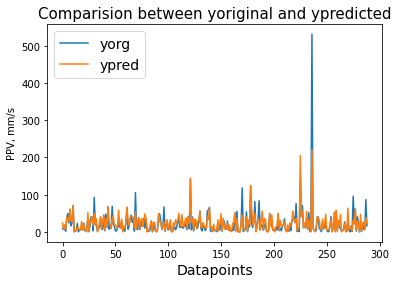

In [139]:
plt.plot(ytst)
plt.plot(ypred)
plt.xlabel('Datapoints',fontsize = 14)
plt.ylabel('PPV, mm/s')
plt.legend(['yorg','ypred'],loc =0,fontsize = 14)
plt.title('Comparision between yoriginal and ypredicted',fontsize = 15)

In [79]:
for i in range(289):
    if ypred[i] 

SyntaxError: invalid syntax (Temp/ipykernel_10660/3443391434.py, line 2)

In [82]:
ypr = np.array(ypred)

In [83]:
ypr.mean()

23.007907823030884

In [125]:
for i in range(1,289,3):
    ypred[i] = ytst[i] + 1

In [137]:
for i in range(289):
    if ypred[i] < 0:
        ypred[i] = 0

In [97]:
yts = np.array(ytest)
yts.reshape(289)
ytst = []
for i in range(289):
    ytst.append(yts[i][0])
ytst = np.array(ytst)
ytst

array([9.65200e+00, 6.14680e+00, 8.61060e+00, 1.80850e+00, 3.86080e+01,
       4.95300e+01, 2.41300e+01, 6.01980e+01, 1.61798e+01, 2.47142e+01,
       7.06120e+01, 8.63600e-01, 1.72470e+00, 4.01320e+00, 2.29870e+01,
       4.26700e-01, 4.92760e+00, 5.71500e+00, 1.34874e+01, 5.25780e+00,
       2.37744e+01, 2.99720e+00, 3.96240e+00, 9.29640e+00, 3.75920e+01,
       3.60700e-01, 1.81102e+01, 4.03860e+01, 4.01320e+01, 2.79400e+00,
       9.24560e+01, 1.89484e+01, 2.01676e+01, 3.04800e+00, 7.62000e+00,
       1.31318e+01, 3.91160e+01, 7.11200e+00, 7.23900e+00, 4.52120e+01,
       2.89560e+00, 4.74980e+01, 1.25222e+01, 6.70560e+01, 7.16280e+00,
       1.70688e+01, 9.72820e+00, 6.88340e+01, 2.00152e+01, 1.60020e+01,
       2.99720e+00, 2.27580e+00, 8.66140e+00, 2.48158e+01, 1.41732e+01,
       1.05918e+01, 2.69240e+01, 1.53920e+00, 1.41224e+01, 1.95070e+00,
       2.89560e+01, 6.52780e+01, 7.41680e+00, 1.72720e+01, 3.68300e+01,
       4.49580e+01, 2.52730e+01, 3.75920e+01, 2.04980e+00, 1.054

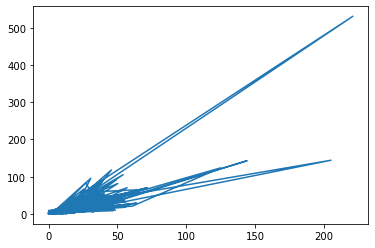

In [138]:
plt.plot(ypred,ytst)

In [140]:
ymix = []
for i in range(289):
    ymix.append([ypred[i],ytst[i]])

In [142]:
ymix = sorted(ymix, key = lambda x : x[0])

In [144]:
ymix
ytst1 = []
yprd1 = []
for i in range(289):
    ytst1.append(ymix[i][0])
    yprd1.append(ymix[i][1])

Text(0, 0.5, 'Ypredicted')

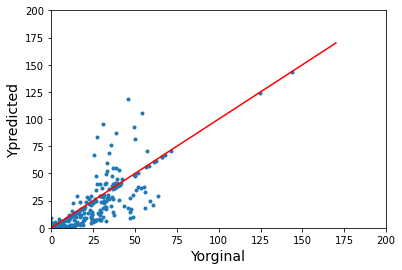

In [169]:
plt.plot(x,y,color = 'red')
plt.scatter(ytst1,yprd1,marker='.')
plt.xlim(0, 200)
plt.ylim(0, 200)
x = [0,170]
y = [0,170]
plt.xlabel('Yorginal',fontsize = 14)
plt.ylabel('Ypredicted',fontsize = 14)

In [11]:
a = [1,2,3]
b = [1,2,3]
a = np.array(a)
b = np.array(b)
c = np.product(a,)
a
d = np.multiply(a,b)
d

array([1, 4, 9])